# **Polynomial Linear Regression ..**

In [1]:
using MLJ,DataFrames
using Markdown
using Plots
using CSV

## **Load Dataset and convert it to a Dataframe ..**

In [69]:
df=CSV.read("Position_Salaries.csv",DataFrame)

Row,Position,Level,Salary
,String31,Int64,Int64
1,Business Analyst,1,45000
2,Junior Consultant,2,50000
3,Senior Consultant,3,60000
4,Manager,4,80000
5,Country Manager,5,110000
6,Region Manager,6,150000
7,Partner,7,200000
8,Senior Partner,8,300000
9,C-level,9,500000


In [70]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Position,,Business Analyst,,Senior Partner,0,String31
2,Level,5.5,1,5.5,10,0,Int64
3,Salary,249500.0,45000,130000.0,1000000,0,Int64


## **Lets see the matemathical type of each row..**
 

In [71]:
schema(df)

┌──────────┬──────────┬──────────┐
│ names    │ scitypes │ types    │
├──────────┼──────────┼──────────┤
│ Position │ Textual  │ String31 │
│ Level    │ Count    │ Int64    │
│ Salary   │ Count    │ Int64    │
└──────────┴──────────┴──────────┘


### **The 4 First ow are independant so they can be use as feature(X) and the last row will be the Target (y)**

In [72]:
x=select(df,:Level)


Row,Level
,Int64
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [73]:
n=4
X=zeros(size(x)[1],n)

10×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [74]:
y=df.Salary

10-element Vector{Int64}:
   45000
   50000
   60000
   80000
  110000
  150000
  200000
  300000
  500000
 1000000

## **Spliting**

In [75]:
train,test=partition(eachindex(y),.8,shuffle=true,rng=123)

([9, 7, 6, 4, 10, 1, 8, 2], [3, 5])

In [76]:
Xtrain,Xtest=X[train,:],X[test, :]


([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0])

In [77]:
ytrain,ytest=y[train],y[test]

([500000, 200000, 150000, 80000, 1000000, 45000, 300000, 50000], [60000, 110000])

## **Load Linear Regressor from MLJ**

In [78]:
LR=@load LinearRegressor pkg=MLJLinearModels

import MLJLinearModels ✔


[ Info: For silent loading, specify `verbosity=0`. 


MLJLinearModels.LinearRegressor

In [79]:
lr_=LR()

LinearRegressor(
  fit_intercept = true, 
  solver = nothing)

In [80]:
sc_=Standardizer()

Standardizer(
  features = Symbol[], 
  ignore = false, 
  ordered_factor = false, 
  count = false)

In [81]:
for i in 1:n
    sc=machine(sc_,x.Level[train].^i)|>fit!
    Xtrain[:,i]=MLJ.transform(sc,x.Level[train].^i)
    Xtest[:,i]=MLJ.transform(sc,x.Level[test].^i)
end

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc MLJModels.Standardizer` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{AbstractVector{Count}}
│ 
│ fit_data_scitype(model) = Tuple{Union{Table, AbstractVector{<:Continuous}}}
└ @ MLJBase ~/.julia/packages/MLJBase/uxwHr/src/machines.jl:230
[ Info: Training machine(Standardizer(features = Symbol[], …), …).
┌ Warning: The number and/or types of data argume

## **Train and Fit**

In [82]:
lr=machine(lr_,table(Xtrain),ytrain) |> fit!

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc MLJLinearModels.LinearRegressor` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{Table{AbstractVector{Continuous}}, AbstractVector{Count}}
│ 
│ fit_data_scitype(model) = Tuple{Table{<:AbstractVector{<:Continuous}}, AbstractVector{Continuous}}
└ @ MLJBase ~/.julia/packages/MLJBase/uxwHr/src/machines.jl:230
[ Info: Training machine(LinearRegressor(fit_inte

trained Machine; caches model-specific representations of data
  model: LinearRegressor(fit_intercept = true, …)
  args: 
    1:	Source @103 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @631 ⏎ AbstractVector{Count}


## **Show fitted parameter of training**

In [83]:
fitted_params(lr)

(coefs = [:x1 => -736526.5272834314, :x2 => 3.6766516872890526e6, :x3 => -5.9956259119889755e6, :x4 => 3.387744942707411e6],
 intercept = 290624.99999999965,)

## **Prediction of the test ..**

In [90]:
yhat=predict(lr,table(Xtrain))

8-element Vector{Float64}:
 526168.650080715
 186841.95574125287
 148990.12020257337
  99522.56357913569
 990055.2819563827
  53320.88387039362
 289247.11516324175
  30853.429406302166

## **The mean Squared error is ..**

In [85]:
sum((yhat .- ytest).^2)

3.319254108154981e8

In [89]:
ytest

2-element Vector{Int64}:
  60000
 110000

## **Visualisation by plots ..**

In [86]:
using LaTeXStrings

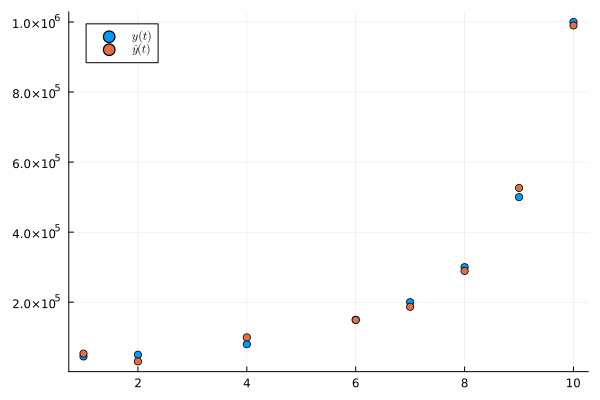

In [96]:
scatter(x.Level[train],ytrain,label=L"y(t)")
scatter!(x.Level[train],yhat,label=L"\hat{y}(t)")

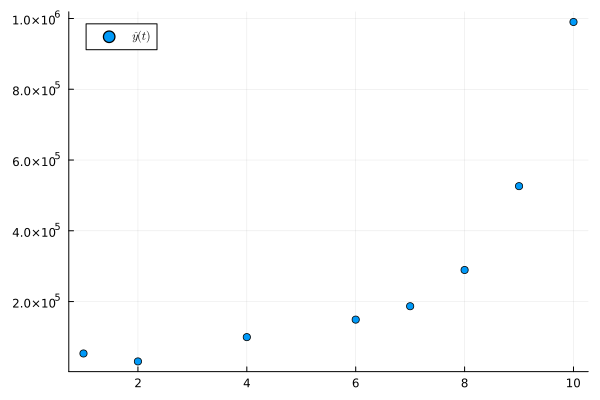

In [94]:
scatter(x.Level[train],yhat,label=L"\hat{y}(t)")